# network diagram


In [35]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy import stats


plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:
df.columns

Index(['StartDate', 'reading', 'Duration', 'Progress', 'Finished', 'Q42',
       'Q43', 'Q1', 'Q1_7_TEXT', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1',
       'Q4_2', 'Q4_3', 'Q4_4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5',
       'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3',
       'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18',
       'Q46'],
      dtype='object')

# WANT the scores for timelines, the scores for each QUESTION, familiarity with each alignment concept, familiarity with empirical ML, when should we build?

In [5]:
# Q3: How familiar are you with the following empirical AI concepts?
# Q4: How familiar are you with the following theoretical AI Alignment concepts?
# Q5: Which best describes your position on when we should build AGI (Artificial General Intelligence)? # For the purposes of this survey, we define AGI as: AI systems that are better at STEM research than the best human scientists, in addition to potentially having other advanced capabilities.

# Q6: rate your agreement with the following statements

# replace the qualitative data with the quantitative data

In [6]:
df['Q3_1'].value_counts().sort_index()

Know a fair amount    23
Know a little         13
Know it well          50
Name: Q3_1, dtype: int64

In [7]:
timelines_positions = {
    "We should develop more powerful and more general systems as fast as possible": 5,
    "Soon, but not as fast as possible": 3.75,
    "Eventually, but not soon.": 2.5,
    "We should never build AGI": 1.25
}

agreement_swaps = {
    "strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5,
}

familiarity_swaps = {
    "Never heard of it": 1,
    "Heard of it": 2,
    "Know a little": 3,
    "Know a fair amount": 4,
    "Know it well": 5,
}

pre_questions = [f'Q6_{i}' for i in range(1, 10)]
familiarity_questions = [f'Q3_{i}' for i in range(1, 4)]
timelines_questions = "Q5"


In [8]:
# get just the df of the questions we care about
df = df[pre_questions + familiarity_questions + [timelines_questions]]
# df = df[pre_questions + [timelines_questions]]

In [9]:
# replace the strings with numbers
df = df.replace({
    **agreement_swaps,
    **familiarity_swaps,
    **timelines_positions,
})

df

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q3_1,Q3_2,Q3_3,Q5
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,5.00
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# rename columns Q6_1 -> Q6_9 to "agreement_x"
df = df.rename(columns={k: f"agreement_{i}" for i, k in enumerate(pre_questions, 1)})

# rename columns Q3_1 -> Q3_3 to "familiarity_x"
df = df.rename(columns={k: f"familiarity_{i}" for i, k in enumerate(familiarity_questions, 1)})

# rename Q5 to "timelines"
df = df.rename(columns={timelines_questions: "timelines"})

In [11]:
df.columns

Index(['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4',
       'agreement_5', 'agreement_6', 'agreement_7', 'agreement_8',
       'agreement_9', 'familiarity_1', 'familiarity_2', 'familiarity_3',
       'timelines'],
      dtype='object')

In [12]:
# drop the rows with NaN
df = df.dropna()
df

,agreement_1,agreement_2,agreement_3,agreement_4,agreement_5,agreement_6,agreement_7,agreement_8,agreement_9,familiarity_1,familiarity_2,familiarity_3,timelines
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2.0,1.0,5.0,2.0,3.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,3.75
100,5.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0,1.25
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,5.00


In [13]:
# make a correlation matrix
corr = df.corr()

In [14]:
corr

,agreement_1,agreement_2,agreement_3,agreement_4,agreement_5,agreement_6,agreement_7,agreement_8,agreement_9,familiarity_1,familiarity_2,familiarity_3,timelines
agreement_1,1.000000,0.013416,-0.323391,0.228494,0.331588,0.209998,-0.282695,0.306092,-0.209627,0.209911,0.242772,0.216876,0.087208
agreement_2,0.013416,1.000000,0.067339,-0.049224,-0.227772,-0.207759,0.327208,0.070122,0.164593,-0.017936,0.249619,-0.040812,-0.047938
agreement_3,-0.323391,0.067339,1.000000,-0.012500,-0.036712,-0.000192,0.160066,0.050923,0.012799,-0.203068,-0.204255,-0.150256,0.037698
agreement_4,0.228494,-0.049224,-0.012500,1.000000,0.461805,0.386953,-0.014035,-0.137560,-0.004219,0.172885,0.158934,0.047737,0.024255
agreement_5,0.331588,-0.227772,-0.036712,0.461805,1.000000,0.640732,-0.222707,-0.021310,-0.128322,0.087901,0.061680,0.067409,0.305841
agreement_6,0.209998,-0.207759,-0.000192,0.386953,0.640732,1.000000,-0.265257,-0.074219,-0.331018,0.170675,-0.057666,0.026021,0.255978
agreement_7,-0.282695,0.327208,0.160066,-0.014035,-0.222707,-0.265257,1.000000,0.053840,0.274183,-0.072597,0.125652,-0.097918,-0.213453
agreement_8,0.306092,0.070122,0.050923,-0.137560,-0.021310,-0.074219,0.053840,1.000000,-0.023565,0.005758,0.101386,0.064095,0.229947
agreement_9,-0.209627,0.164593,0.012799,-0.004219,-0.128322,-0.331018,0.274183,-0.023565,1.000000,0.021899,0.079456,0.035560,-0.188585
familiarity_1,0.209911,-0.017936,-0.203068,0.172885,0.087901,0.170675,-0.072597,0.005758,0.021899,1.000000,0.619883,0.407618,0.007523


In [21]:
type(corr)

pandas.core.frame.DataFrame

In [22]:
corr.columns

Index(['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4',
       'agreement_5', 'agreement_6', 'agreement_7', 'agreement_8',
       'agreement_9', 'familiarity_1', 'familiarity_2', 'familiarity_3',
       'timelines'],
      dtype='object')

In [27]:


def plot_correlation_network(correlation_matrix, relabels=None, threshold=0.25, figsize=(7,7)):
    """
    Create a publication-quality network visualization of correlation matrices.
    
    Args:
        correlation_matrix (pd.DataFrame): Correlation matrix
        relabels (dict): Dictionary mapping original labels to new labels
        threshold (float): Minimum absolute correlation to show edge
        figsize (tuple): Figure size in inches (width, height)
    """
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create network
    G = nx.Graph()
    
    # Add nodes
    nodes = list(correlation_matrix.columns)
    G.add_nodes_from(nodes)
    n_nodes = len(nodes)
    
    # Calculate node positions in a circle
    pos = {node: (np.cos(2*np.pi*i/n_nodes), np.sin(2*np.pi*i/n_nodes)) 
           for i, node in enumerate(nodes)}
    
    # Define node colors based on groups
    tool_ai = {'agreement_4', 'agreement_5', 'agreement_6'}
    autonomous_ai = {'agreement_7', 'agreement_9'}
    
    node_colors = []
    for node in nodes:
        if node in tool_ai:
            node_colors.append('#add8e6')  # Light blue
        elif node in autonomous_ai:
            node_colors.append('#ffcba4')  # Light orange
        else:
            node_colors.append('#d3d3d3')  # Light gray
    
    # Add edges above threshold
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) >= threshold:
                G.add_edge(nodes[i], nodes[j], 
                          weight=abs(corr),
                          color='blue' if corr > 0 else 'red')
    
    # Draw network
    nx.draw_networkx_nodes(G, pos, 
                          node_color=node_colors,
                          node_size=1000,
                          alpha=0.7)
    
    # Draw edges
    edges = G.edges()
    edge_colors = [G[u][v]['color'] for u, v in edges]
    edge_weights = [G[u][v]['weight'] * 3 for u, v in edges]
    
    nx.draw_networkx_edges(G, pos,
                          edge_color=edge_colors,
                          width=edge_weights,
                          alpha=0.5)
    
    # Add labels
    if relabels is None:
        labels = {node: node for node in nodes}
    else:
        labels = {node: relabels.get(node, node) for node in nodes}
    
    nx.draw_networkx_labels(G, pos, labels,
                           font_size=8)
    
    # Add legend
    legend_elements = [
        Line2D([0], [0], color='blue', lw=2, label='Positive correlation'),
        Line2D([0], [0], color='red', lw=2, label='Negative correlation'),
        plt.scatter([], [], c='#add8e6', label='Tool AI beliefs'),
        plt.scatter([], [], c='#ffcba4', label='Autonomous AI beliefs'),
        plt.scatter([], [], c='#d3d3d3', label='Other beliefs')
    ]
    
    ax.legend(handles=legend_elements, 
             loc='center left',
             bbox_to_anchor=(1, 0.5))
    
    # Remove axes
    ax.set_axis_off()
    
    # Add title
    plt.title('AI Safety Belief Correlation Network\n', 
             fontsize=12, 
             pad=20)
    
    # Adjust layout to prevent cutoff
    plt.tight_layout()
    
    return fig, ax

In [31]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [32]:
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'

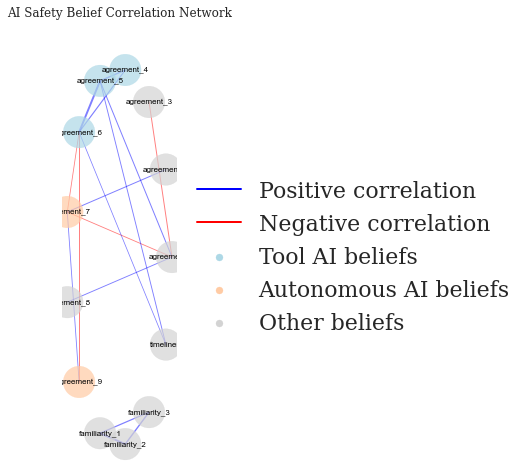

In [38]:
plt.rcParams.update({
    'font.size': 22,  # Base font size
    'axes.titlesize': 26,  # Plot title
    'axes.labelsize': 24,  # Axis labels
    'xtick.labelsize': 22,  # X-axis tick labels
    'ytick.labelsize': 22,  # Y-axis tick labels
    'legend.fontsize': 22,  # Legend text
    'legend.title_fontsize': 24,  # Legend title
    'figure.titlesize': 28,  # Figure title
})

# If you want to adjust specific sizes in the network plot, you can also modify:
network_font_sizes = {
    'node_font_size': 10,  # Size of node labels
    'edge_font_size': 8,   # Size of edge labels (if you add them)
    'title_font_size': 16, # Size of the network title
    'legend_font_size': 12 # Size of the legend text
}
# Example usage:
fig, ax = plot_correlation_network(
    corr,
    # relabels={'agreement_1': 'AGI timeline concerns',
    #           'agreement_2': 'AI moral status'},
    threshold=0.25,
    figsize=(7, 7)
)
plt.show()

In [13]:
# Q3: How familiar are you with the following empirical AI concepts?
# Q4: How familiar are you with the following theoretical AI Alignment concepts?
# Q5: Which best describes your position on when we should build AGI (Artificial General Intelligence)? # For the purposes of this survey, we define AGI as: AI systems that are better at STEM research than the best human scientists, in addition to potentially having other advanced capabilities.

# Q6: rate your agreement with the following statements